In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('pandas_data/gdp.csv', skiprows=4)
df.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 63'], axis=1, inplace=True)

In [4]:
df.head(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.519748,-3.685030,3.446055,-1.369863,4.198232,0.848228,-0.450586,-0.211225,1.330511,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292,1.030660
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.858713,4.859220,3.471981,8.542147,4.954590,4.822626,0.943576,-2.580097,-0.147207,-2.133493
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.349994,3.706881,2.545405,1.417526,1.001988,1.770000,2.230000,3.350000,3.836620,4.004413
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.690654,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.724022,1.629345


In [5]:
df['Country Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       '

In [6]:
countries = [
#     'Afghanistan',
    'Brazil',
    'India',
#     'Pakistan',
    'United Arab Emirates',
    'China',
#     'Denmark',
    'Ireland',
#     'United Kingdom',
    'Canada',
    'Australia',
    'South Africa',
    'Saudi Arabia',
    'United States'
]

In [7]:
df= df[df['Country Name'].apply(lambda x: x in countries)]

In [8]:
df['Country Name'].unique()

array(['United Arab Emirates', 'Australia', 'Brazil', 'Canada', 'China',
       'India', 'Ireland', 'Saudi Arabia', 'United States',
       'South Africa'], dtype=object)

In [9]:
inverted_df = df.melt(id_vars=["Country Name", "Country Code"], 
        var_name="Year", 
        value_name="Value")

In [10]:
inverted_df.shape

(590, 4)

In [11]:
inverted_df.isna().sum()

Country Name     0
Country Code     0
Year             0
Value           44
dtype: int64

In [12]:
inverted_df['Value'] = inverted_df['Value'].fillna(0)

In [13]:
inverted_df.isna().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [14]:
inverted_df['Value'] = inverted_df['Value'].apply(lambda x: round(x, 2))

In [15]:
inverted_df.columns

Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')

In [16]:
inverted_df['Year'] = inverted_df['Year'].apply(lambda x: int(x))

In [17]:
inverted_df

,Country Name,Country Code,Year,Value
0,United Arab Emirates,ARE,1960,0.00
1,Australia,AUS,1960,0.00
2,Brazil,BRA,1960,0.00
3,Canada,CAN,1960,0.00
4,China,CHN,1960,0.00
...,...,...,...,...
585,India,IND,2018,6.98
586,Ireland,IRL,2018,8.17
587,Saudi Arabia,SAU,2018,2.21
588,United States,USA,2018,2.86


In [18]:
inverted_df['Year'].min()

1960

In [19]:
inverted_df['Year'].max()

2018

In [20]:
current_year = 2008
dff = inverted_df[inverted_df['Year'].eq(current_year)].sort_values(by='Value', ascending=False).head(10)
dff

,Country Name,Country Code,Year,Value
484,China,CHN,2008,9.65
487,Saudi Arabia,SAU,2008,6.25
482,Brazil,BRA,2008,5.09
481,Australia,AUS,2008,3.66
480,United Arab Emirates,ARE,2008,3.19
489,South Africa,ZAF,2008,3.19
485,India,IND,2008,3.09
483,Canada,CAN,2008,1.01
488,United States,USA,2008,-0.14
486,Ireland,IRL,2008,-4.48


<BarContainer object of 10 artists>

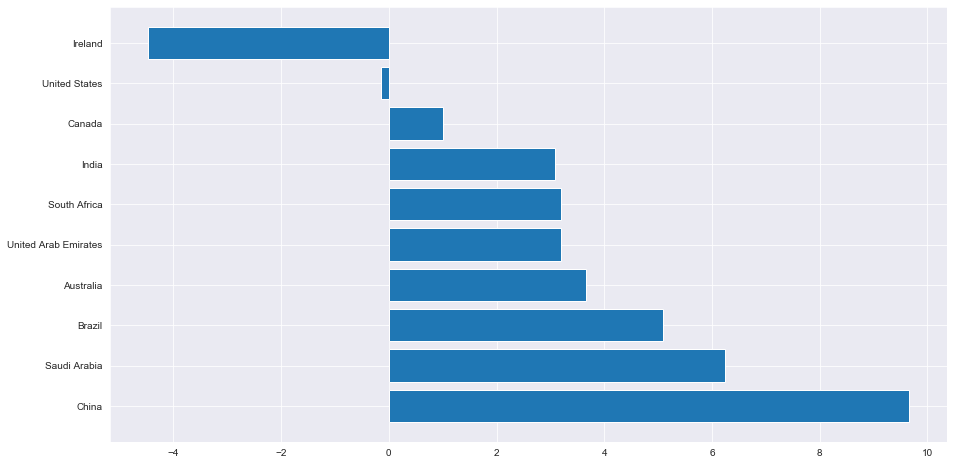

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Country Name'], dff['Value'])

In [22]:
colors = {}
for country in df['Country Name'].unique():
    x, y, z = np.random.randint(low=50, high=200, size=3)
    color = '#%02x%02x%02x' % (x, y, z)
    colors[country] = color

In [23]:
colors

{'United Arab Emirates': '#b67ea2',
 'Australia': '#9a6667',
 'Brazil': '#543832',
 'Canada': '#bd3f62',
 'China': '#50a4af',
 'India': '#4ba538',
 'Ireland': '#5d32ab',
 'Saudi Arabia': '#35524c',
 'United States': '#c14133',
 'South Africa': '#95b86c'}

Text(1, 0.4, '2008')

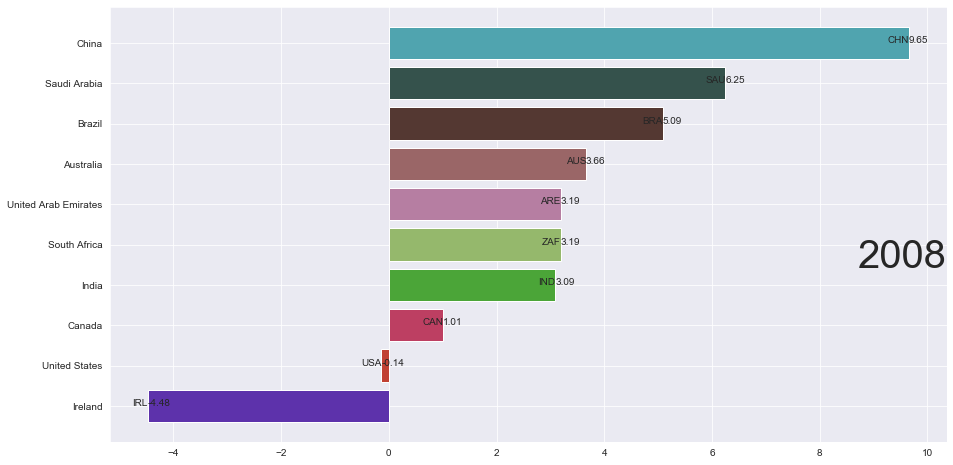

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
ax.barh(dff['Country Name'], dff['Value'], color=[colors[x] for x in dff['Country Name']])
for i, (value, name) in enumerate(zip(dff['Value'], dff['Country Code'])):
    ax.text(value, i,     name,            ha='right')
    ax.text(value, i,     value,           ha='left') 
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=40, ha='right')

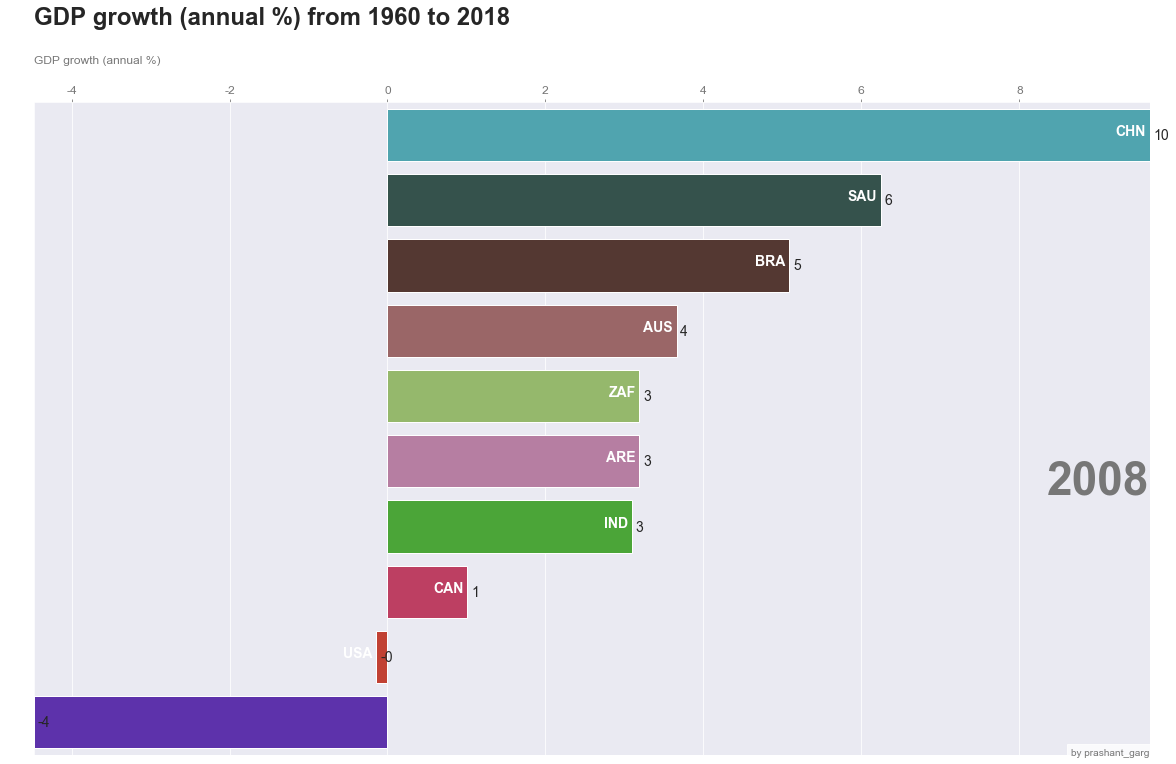

In [25]:
fig, ax = plt.subplots(figsize=(20, 12))
def draw_barchart(year):
    dff = inverted_df[inverted_df['Year'].eq(year)].sort_values(by='Value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country Name'], dff['Value'], color=[colors[x] for x in dff['Country Name']])
    dx = dff['Value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Value'], dff['Country Code'])):
        ax.text(value-dx, i,     name,           size=14, color='#FFFFFF', weight=600, ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'GDP growth (annual %)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'GDP growth (annual %) from 1960 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by prashant_garg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
#     plt.box(False)
    
draw_barchart(2008)

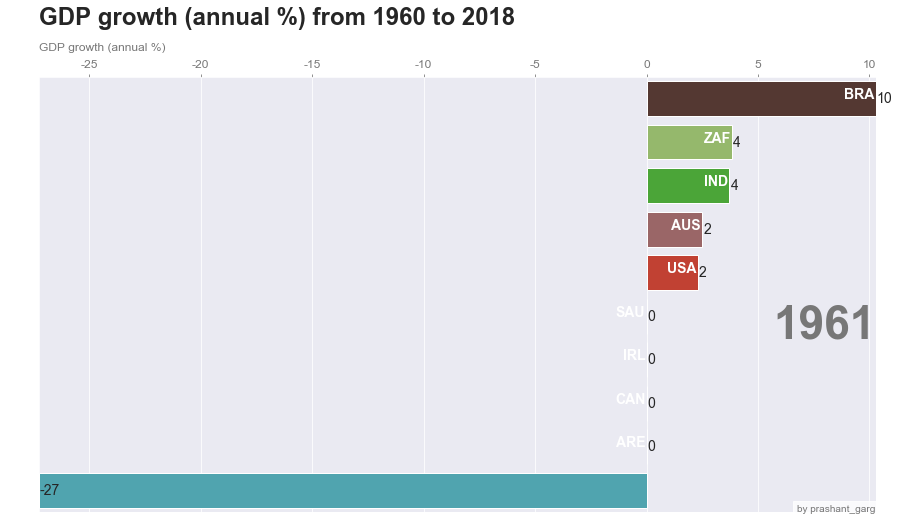

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
# animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1961, 2019), interval=2000)
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1961, 2019), interval=1000)
HTML(animator.to_jshtml()) 